In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np


file_path = '/content/drive/MyDrive/online_sales_dataset.csv'

try:
    sales_df = pd.read_csv(file_path)


    print("--- First 5 Rows (head) ---")
    print(sales_df.head())
    print("\n")

    print("--- Data Types and Info ---")
    sales_df.info()
    print("\n")

    print("--- Statistical Summary (describe) ---")
    print(sales_df.describe())

except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    print("Please double-check the file path using the 'Copy path' method.")
except Exception as e:
    print(f"An error occurred: {e}")


--- First 5 Rows (head) ---
   InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241   White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501  Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760   Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386   USB Cable       -30  2020-01-01 04:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation

In [7]:

df_cleaned = sales_df.copy()

print(f"Original row count: {len(df_cleaned)}")


df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


df_cleaned.dropna(subset=['CustomerID'], inplace=True)
print(f"Rows after dropping missing CustomerID: {len(df_cleaned)}")


df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]
print(f"Rows after dropping negative Qty/Price: {len(df_cleaned)}")


df_cleaned = df_cleaned[df_cleaned['Discount'] <= 1.0]
print(f"Rows after dropping impossible discounts: {len(df_cleaned)}")



median_shipping = df_cleaned['ShippingCost'].median()
df_cleaned['ShippingCost'].fillna(median_shipping, inplace=True)


df_cleaned['WarehouseLocation'].fillna('Unknown', inplace=True)


print("\n--- Original Payment Methods ---")
print(df_cleaned['PaymentMethod'].unique())


df_cleaned['PaymentMethod'] = df_cleaned['PaymentMethod'].replace('paypall', 'PayPal')

print("\n--- Corrected Payment Methods ---")
print(df_cleaned['PaymentMethod'].unique())



df_cleaned['TotalPrice'] = (df_cleaned['Quantity'] * df_cleaned['UnitPrice']) * (1 - df_cleaned['Discount'])


df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)



print("\n\n--- CLEANED DATA INFO ---")
df_cleaned.info()

print("\n\n--- CLEANED DATA SUMMARY ---")
print(df_cleaned.describe())

print("\n\n--- CLEANED DATA HEAD ---")
print(df_cleaned.head())

Original row count: 49782
Rows after dropping missing CustomerID: 44804
Rows after dropping negative Qty/Price: 44804
Rows after dropping impossible discounts: 44804

--- Original Payment Methods ---
['Bank Transfer' 'paypall' 'Credit Card']

--- Corrected Payment Methods ---
['Bank Transfer' 'PayPal' 'Credit Card']


--- CLEANED DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          44804 non-null  int64         
 1   StockCode          44804 non-null  object        
 2   Description        44804 non-null  object        
 3   Quantity           44804 non-null  int64         
 4   InvoiceDate        44804 non-null  datetime64[ns]
 5   UnitPrice          44804 non-null  float64       
 6   CustomerID         44804 non-null  int64         
 7   Country            44804 non-null  object        


/tmp/ipython-input-2269310988.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['ShippingCost'].fillna(median_shipping, inplace=True)
/tmp/ipython-input-2269310988.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

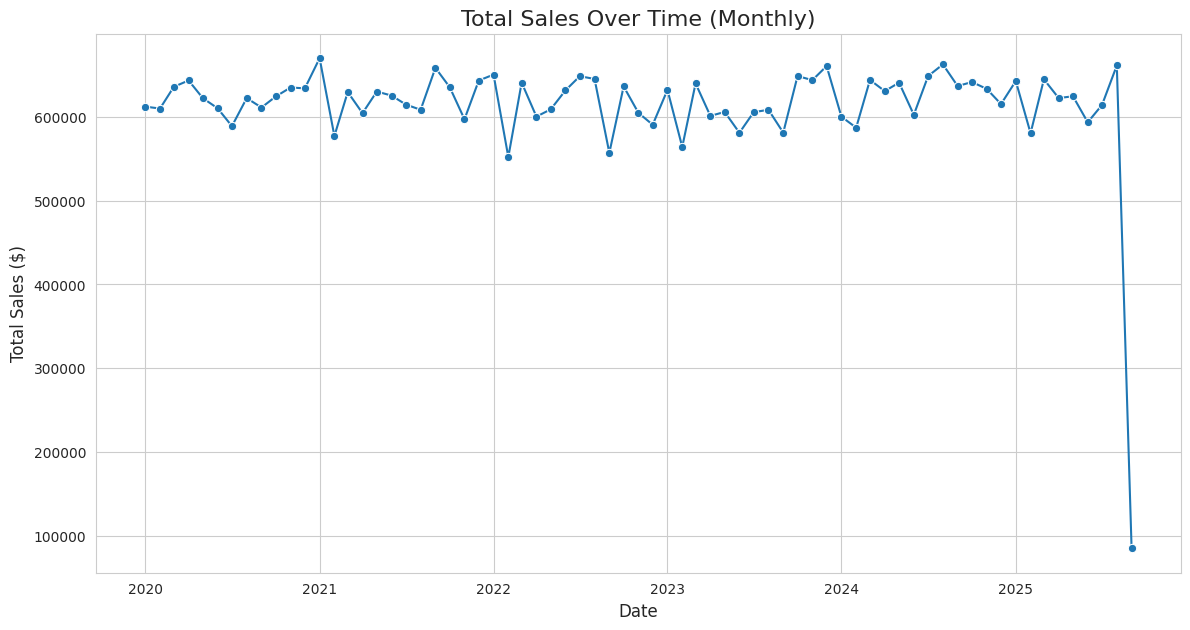

/tmp/ipython-input-350153449.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_category_sales.values, y=df_category_sales.index, palette='viridis')


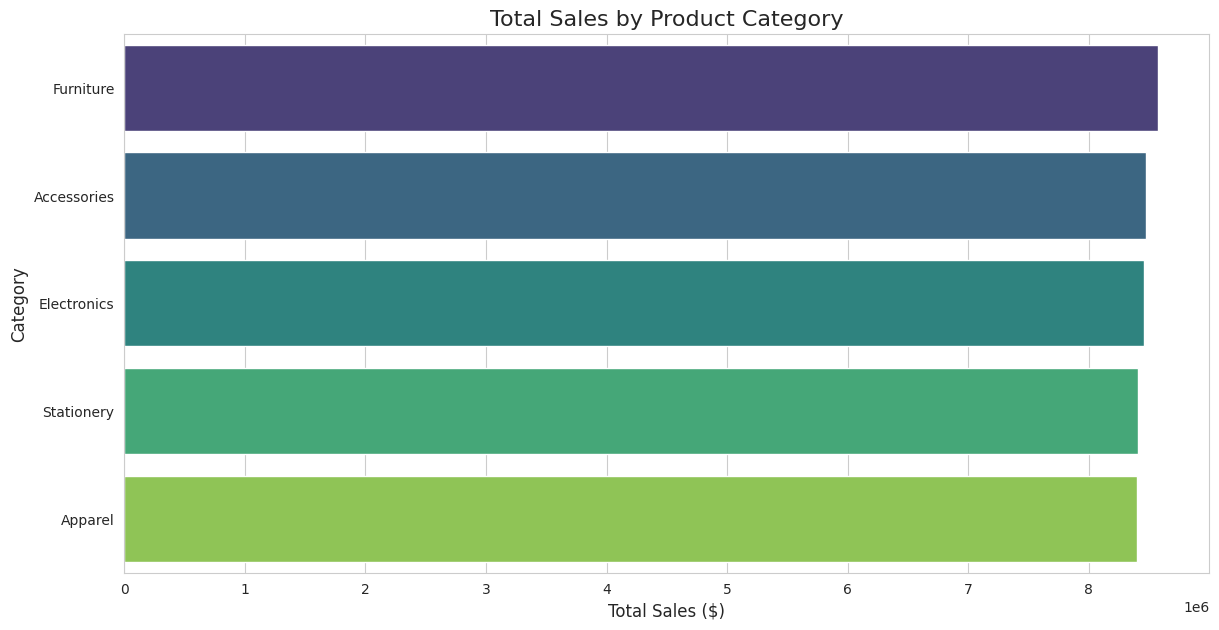

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


df_monthly_sales = df_cleaned.set_index('InvoiceDate').resample('MS')['TotalPrice'].sum()


plt.figure(figsize=(14, 7))
sns.lineplot(data=df_monthly_sales, marker='o')

plt.title('Total Sales Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()



df_category_sales = df_cleaned.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(x=df_category_sales.values, y=df_category_sales.index, palette='viridis')

plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

/tmp/ipython-input-926631992.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_country_sales.values, y=df_country_sales.index, palette='plasma')


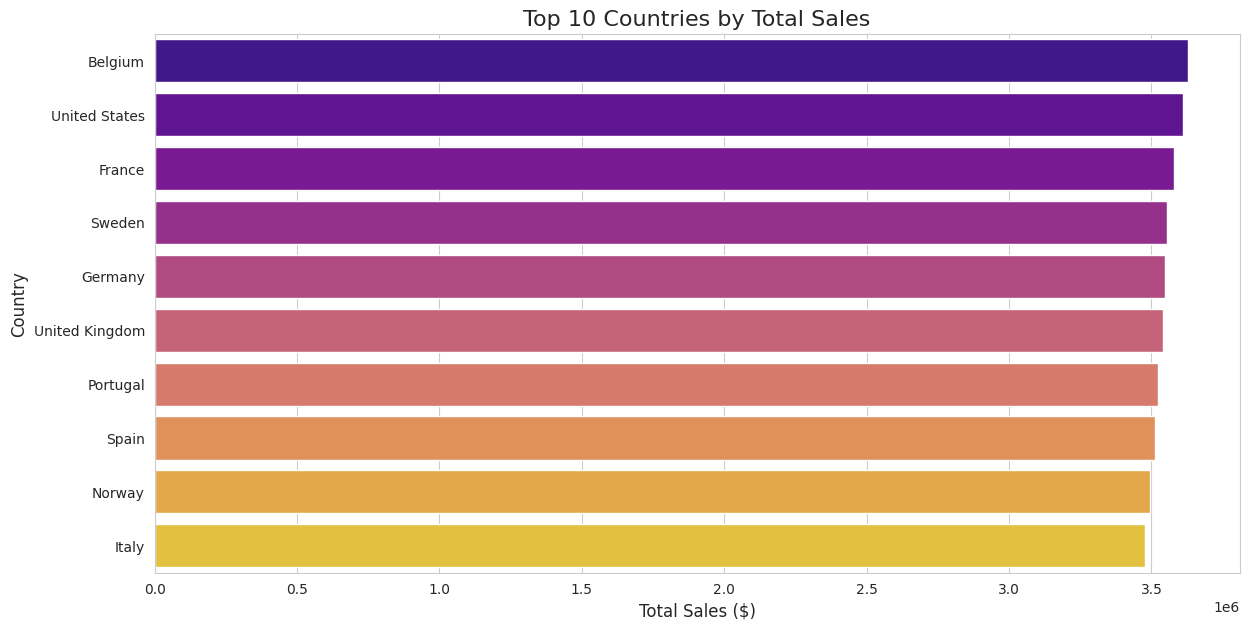

/tmp/ipython-input-926631992.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_payment_sales.index, y=df_payment_sales.values, palette='Blues_d')


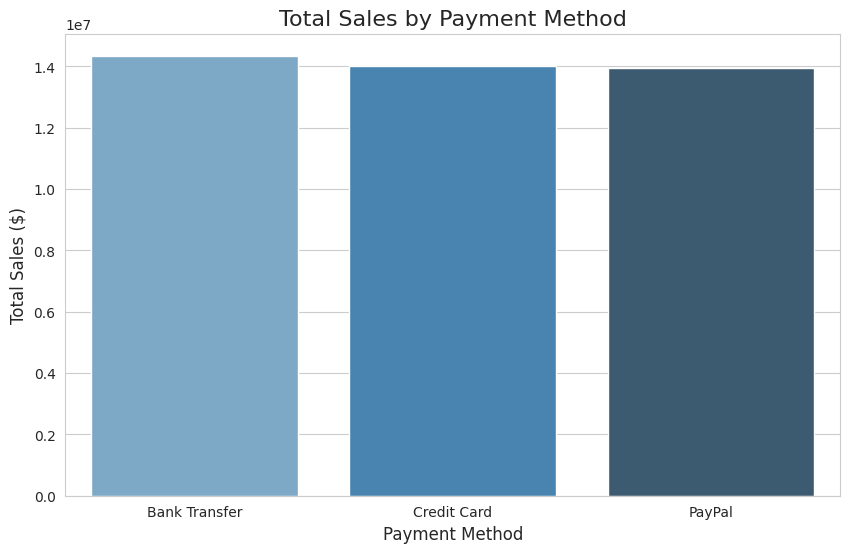

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df_country_sales = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=df_country_sales.values, y=df_country_sales.index, palette='plasma')

plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

df_payment_sales = df_cleaned.groupby('PaymentMethod')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_payment_sales.index, y=df_payment_sales.values, palette='Blues_d')

plt.title('Total Sales by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()


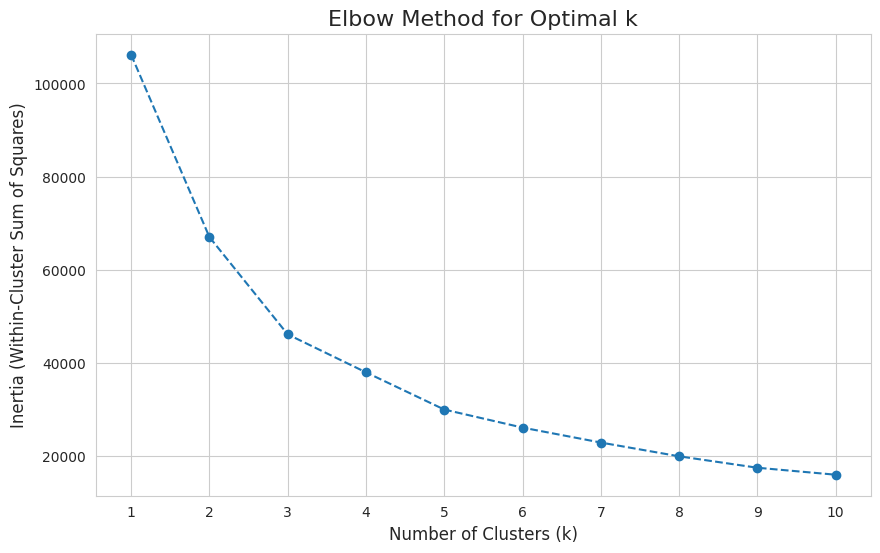

--- RFM Features Head (First 5 Customers) ---
   CustomerID  Recency  Frequency   Monetary  Cluster
0       10001      742          1  1470.7334        2
1       10003     1842          1   365.7385        0
2       10005      251          2  2350.1430        1
3       10008      145          1    48.8280        2
4       10009     1826          1   463.5904        0


--- Cluster Analysis (Average RFM per Cluster) ---
   Cluster      Recency  Frequency     Monetary
0        0  1578.625406   1.030624   644.095709
1        1   627.567017   2.184231  2127.159590
2        2   502.706400   1.002993   630.425054
3        3  1016.584778   1.002326  2417.978484


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)


rfm_df = df_cleaned.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()



rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]


scaler = StandardScaler()


rfm_scaled = scaler.fit_transform(rfm_features)




inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_model.fit(rfm_scaled)
    inertia.append(kmeans_model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(K_range)
plt.show()


optimal_k = 4


final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
rfm_df['Cluster'] = final_kmeans.fit_predict(rfm_scaled)



cluster_analysis = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("--- RFM Features Head (First 5 Customers) ---")
print(rfm_df.head())
print("\n")

print("--- Cluster Analysis (Average RFM per Cluster) ---")
print(cluster_analysis)

In [15]:
!pip install dash jupyter-dash plotly

In [18]:
import pandas as pd
import plotly.express as px
import dash
from dash import Dash, dcc, html

df_monthly_sales = df_cleaned.set_index('InvoiceDate').resample('MS')['TotalPrice'].sum().reset_index()

df_category_sales = df_cleaned.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

df_country_sales = df_cleaned.groupby('Country')['TotalPrice'].sum().reset_index()

cluster_analysis_avg = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
rfm_with_avg = rfm_df.merge(cluster_analysis_avg, on='Cluster', suffixes=('_customer', '_avg'))
rfm_with_avg['Cluster'] = rfm_with_avg['Cluster'].astype(str)

fig_time_series = px.line(df_monthly_sales,
                          x='InvoiceDate',
                          y='TotalPrice',
                          title='Total Sales Over Time')
fig_time_series.update_layout(xaxis_title='Date', yaxis_title='Total Sales ($)')

fig_categories = px.bar(df_category_sales,
                        x='TotalPrice',
                        y='Category',
                        orientation='h',
                        title='Total Sales by Product Category')
fig_categories.update_layout(xaxis_title='Total Sales ($)', yaxis_title='Category')

fig_map = px.choropleth(df_country_sales,
                        locations='Country',
                        locationmode='country names',
                        color='TotalPrice',
                        hover_name='Country',
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title='Total Sales by Country')

fig_clusters = px.scatter(rfm_with_avg,
                          x='Recency_customer',
                          y='Monetary_customer',
                          color='Cluster',
                          hover_data=['CustomerID', 'Frequency_customer'],
                          title='Customer Segments (Recency vs. Monetary)')
fig_clusters.update_layout(xaxis_title='Recency (Days)', yaxis_title='Monetary (Total Spent)')

app = Dash(__name__)

app.layout = html.Div(children=[
    html.H1(
        children='InfoGraphIQ: E-Commerce Sales Dashboard',
        style={'textAlign': 'center', 'fontFamily': 'Arial'}
    ),

    html.H2('Key Performance Indicators (KPIs) & Trends', style={'fontFamily': 'Arial'}),

    html.Div(className='row', children=[
        html.Div(dcc.Graph(id='time-series-chart', figure=fig_time_series), style={'width': '50%', 'display': 'inline-block'}),
        html.Div(dcc.Graph(id='category-chart', figure=fig_categories), style={'width': '50%', 'display': 'inline-block'})
    ]),

    html.H2('Geographic & Customer Analysis', style={'fontFamily': 'Arial', 'marginTop': '30px'}),

    html.Div(className='row', children=[
        html.Div(dcc.Graph(id='map-chart', figure=fig_map), style={'width': '50%', 'display': 'inline-block'}),
        html.Div(dcc.Graph(id='cluster-chart', figure=fig_clusters), style={'width': '50%', 'display': 'inline-block'})
    ])
])

if __name__ == '__main__':
    app.run(jupyter_mode="inline")

<IPython.core.display.Javascript object>

In [19]:
!pip freeze > requirements.txt